<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#All-you-need-to-import" data-toc-modified-id="All-you-need-to-import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>All you need to import</a></span></li><li><span><a href="#Toy-examples" data-toc-modified-id="Toy-examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Toy examples</a></span><ul class="toc-item"><li><span><a href="#Example-1-(Moons)" data-toc-modified-id="Example-1-(Moons)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Example 1 (Moons)</a></span></li><li><span><a href="#Example-2-(Sinusoidal)" data-toc-modified-id="Example-2-(Sinusoidal)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Example 2 (Sinusoidal)</a></span></li><li><span><a href="#Example-3-(Gaussian)" data-toc-modified-id="Example-3-(Gaussian)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Example 3 (Gaussian)</a></span></li></ul></li><li><span><a href="#Real-world-Examples" data-toc-modified-id="Real-world-Examples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Real world Examples</a></span><ul class="toc-item"><li><span><a href="#MNIST-Dataset-(digit-classification)" data-toc-modified-id="MNIST-Dataset-(digit-classification)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>MNIST Dataset (digit classification)</a></span></li><li><span><a href="#Breast-Cancer-dataset" data-toc-modified-id="Breast-Cancer-dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Breast Cancer dataset</a></span></li></ul></li></ul></div>

# DeepLearning from scratch

Here is implementation of Neural Network from scratch without using any libraries of ML Only numpy is used for NN and matplotlib for plotting the results

##  Features
**Implementation includes following**

**Optimization**
* Gradient Decent -Basic one
* Momentum
* RMSprop
* Adam (RMS+ Momentum)

**Regularization**
* L2 Penalization
* Dropouts

**Data set**
* Two class dataset : Gaussian, Linear, Moons, Spiral, Sinasodal
* Multiclass: gaussian distribuated data upto 9 classes

## All you need to import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# DL library (code included)
from DeepNet import deepNet

# Toy Dataset 
import DataSet as ds

## Toy examples

### Example 1 (Moons)

In [2]:
dtype = ['MOONS','GAUSSIANS','LINEAR','SINUSOIDAL','SPIRAL']

X, y,_ = ds.create_dataset(100, dtype[0],0.0,varargin = 'PRESET');

Xts, yts,_ = ds.create_dataset(100, dtype[0],0.1,varargin = 'PRESET');

print(X.shape, y.shape)

(2, 100) (1, 100)


In [3]:
NN = deepNet(X,y,Xts=Xts, yts=yts, Net = [3,4],NetAf =['tanh'], alpha=0.01,miniBatchSize = 0.3, 
             printCostAt =100,AdamOpt=True,lambd=0,keepProb =[1.0])

#Classes   :  2
#Features  :  2
#Examples  :  100
Network    :  [2, 3, 4, 1]
ActiFun    :  ['tanh', 'tanh', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0]


In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


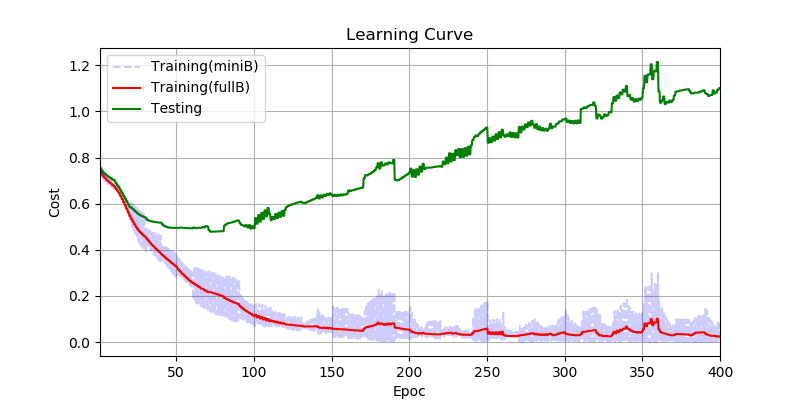

<IPython.core.display.Javascript object>


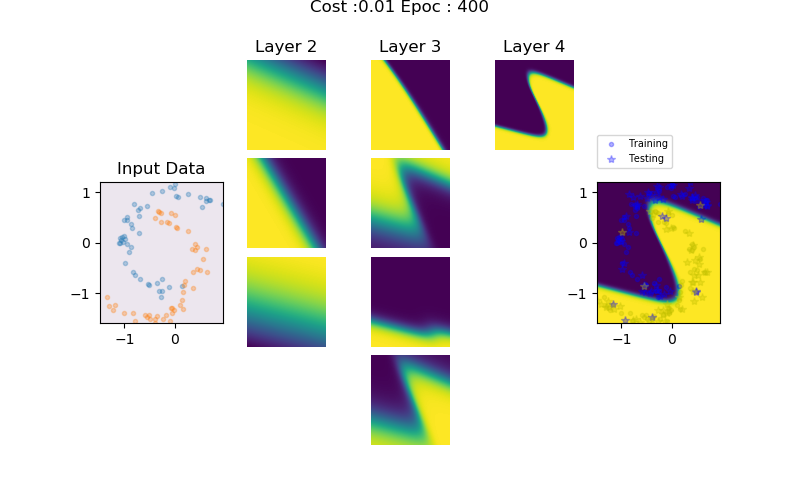

Epoc @ 300 : Training Cost 4.273764e-02  Testing Cost 9.648173e-01
Epoc @ 400 : Training Cost 2.419478e-02  Testing Cost 1.101291e+00
-------------Info---------------
#Classes   :  2
#Features  :  2
#Examples  :  100
Network    :  [2, 3, 4, 1]
ActiFun    :  ['tanh', 'tanh', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0]
Alpha      :  0.01
B1, B2     :  0.9 0.99
lambd      :  0
AdamOpt    :  True
---------------------------
Training Accuracy :: 99.0
Testing  Accuracy :: 89.0


In [8]:
fig1=plt.figure(1,figsize=(8,4))
fig2=plt.figure(2,figsize=(8,5))
for i in range(20):
    NN.fit(itr=10)
    NN.PlotLCurve(pause=0)
    fig1.canvas.draw()
    NN.PlotBoundries(Layers=True,pause=0)
    fig2.canvas.draw()
    
NN.PlotLCurve()
NN.PlotBoundries(Layers=True)

print(NN)

yi,yp = NN.predict(X)
yti,ytp = NN.predict(Xts)

print('Training Accuracy ::',100*np.sum(yi==y)/yi.shape[1])
print('Testing  Accuracy ::',100*np.sum(yti==yts)/yti.shape[1])

### Example 2 (Sinusoidal)

In [9]:
dtype = ['MOONS','GAUSSIANS','LINEAR','SINUSOIDAL','SPIRAL']

X, y,_ = ds.create_dataset(200, dtype[3],0.0,varargin = 'PRESET');

Xts, yts,_ = ds.create_dataset(200, dtype[3],0.4,varargin = 'PRESET');

print(X.shape, y.shape)

(2, 200) (1, 200)


In [10]:
NN = deepNet(X,y,Xts=Xts, yts=yts, Net = [8,8,5],NetAf =['tanh'], alpha=0.01,miniBatchSize = 0.3, printCostAt =100,
             AdamOpt=True,lambd=0,keepProb =[1.0])

#Classes   :  2
#Features  :  2
#Examples  :  200
Network    :  [2, 8, 8, 5, 1]
ActiFun    :  ['tanh', 'tanh', 'tanh', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]


In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


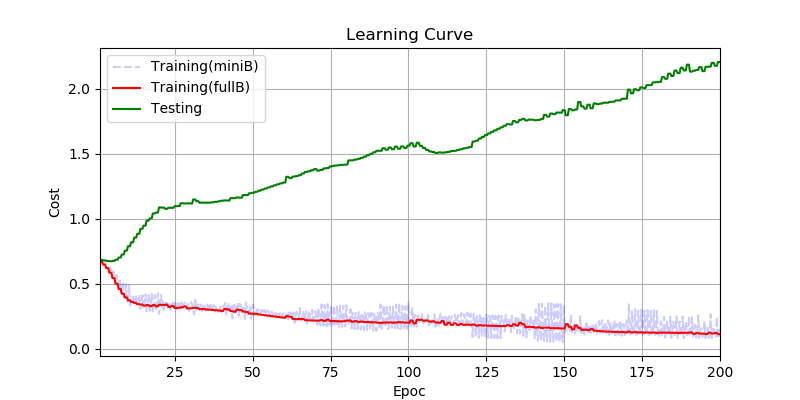

<IPython.core.display.Javascript object>


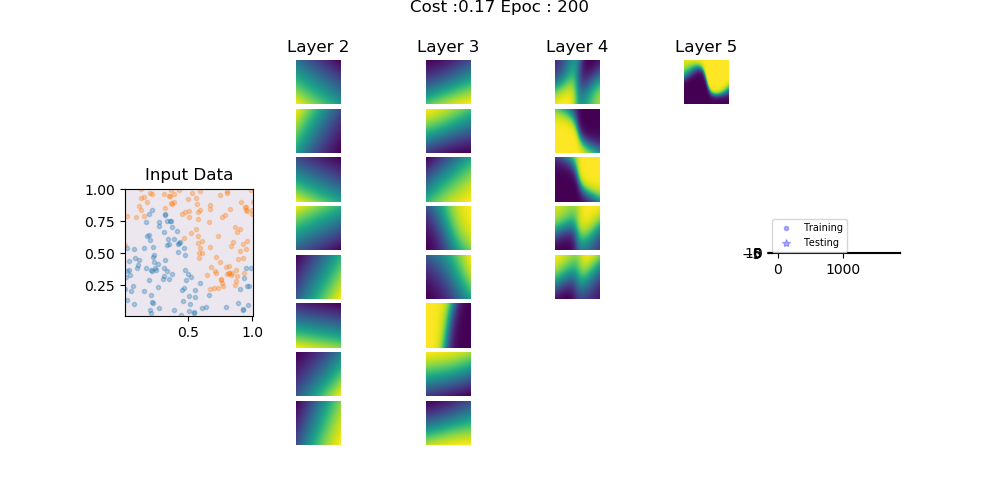

Epoc @ 100 : Training Cost 1.992011e-01  Testing Cost 1.560945e+00
Epoc @ 200 : Training Cost 1.108046e-01  Testing Cost 2.204685e+00
-------------Info---------------
#Classes   :  2
#Features  :  2
#Examples  :  200
Network    :  [2, 8, 8, 5, 1]
ActiFun    :  ['tanh', 'tanh', 'tanh', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]
Alpha      :  0.01
B1, B2     :  0.9 0.99
lambd      :  0
AdamOpt    :  True
---------------------------
Training Accuracy :: 96.5
Testing  Accuracy :: 59.0


In [12]:
plt.close(fig1)
plt.close(fig2)
fig1=plt.figure(1,figsize=(8,4))
fig2=plt.figure(2,figsize=(10,5))
for i in range(20):
    NN.fit(itr=10)
    NN.PlotLCurve(pause=0)
    fig1.canvas.draw()
    NN.PlotBoundries(Layers=True,pause=0)
    fig2.canvas.draw()
    
NN.PlotLCurve()
NN.PlotBoundries(Layers=True)

print(NN)

yi,yp = NN.predict(X)
yti,ytp = NN.predict(Xts)

print('Training Accuracy ::',100*np.sum(yi==y)/yi.shape[1])
print('Testing  Accuracy ::',100*np.sum(yti==yts)/yti.shape[1])

### Example 3 (Gaussian)

In [11]:
Xi, yi = ds.mclassGaus(N=500, nClasses = 4,var =0.25,ShowPlot=False)

[n,N] =Xi.shape

r  = np.random.permutation(N)

X = Xi[:,r[:N//2]]
y = yi[:,r[:N//2]]
Xts =Xi[:,r[N//2:]]
yts =yi[:,r[N//2:]]

print(X.shape, y.shape,Xts.shape,yts.shape)

(2, 2000) (1, 2000)
(2, 1000) (1, 1000) (2, 1000) (1, 1000)


In [12]:
NN = deepNet(X,y,Xts=Xts, yts=yts, Net = [8,8,5],NetAf =['tanh'], alpha=0.01,miniBatchSize = 0.3, 
             printCostAt =-1,AdamOpt=True,lambd=0,keepProb =[1.0])

1 1000 4
1 1000 4
#Classes   :  4
#Features  :  2
#Examples  :  1000
Network    :  [2, 8, 8, 5, 4]
ActiFun    :  ['tanh', 'tanh', 'tanh', 'softmax']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]


In [13]:
plt.close(fig1)
plt.close(fig2)
fig1=plt.figure(1,figsize=(8,4))
fig2=plt.figure(2,figsize=(10,5))
for i in range(20):
    NN.fit(itr=2)
    NN.PlotLCurve(pause=0)
    fig1.canvas.draw()
    NN.PlotBoundries(Layers=True,pause=0)
    fig2.canvas.draw()
    
NN.PlotLCurve()
NN.PlotBoundries(Layers=True)

print(NN)

yi,yp = NN.predict(X)
yti,ytp = NN.predict(Xts)

print('Training Accuracy ::',100*np.sum(yi==y)/yi.shape[1])
print('Testing  Accuracy ::',100*np.sum(yti==yts)/yti.shape[1])

-------------Info---------------
#Classes   :  4
#Features  :  2
#Examples  :  1000
Network    :  [2, 8, 8, 5, 4]
ActiFun    :  ['tanh', 'tanh', 'tanh', 'softmax']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]
Alpha      :  0.01
B1, B2     :  0.9 0.99
lambd      :  0
AdamOpt    :  True
---------------------------
Training Accuracy :: 97.2
Testing  Accuracy :: 95.9


## Real world Examples

### MNIST Dataset (digit classification)

In [62]:
from sklearn.datasets import load_digits

In [ ]:
Xy= load_digits()
X = Xy['data']
y = Xy['target']
print(X.shape, y.shape)

<IPython.core.display.Javascript object>


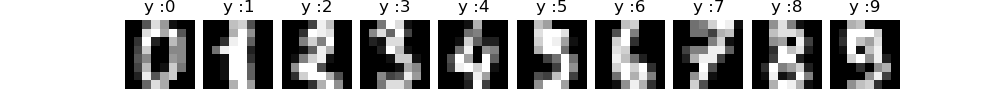

In [100]:
fig=plt.figure(1,figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape([8,8]),cmap='gray',aspect='auto')
    plt.title('y :' + str(y[i]))
    plt.axis('off')
plt.subplots_adjust(top=0.8,wspace=0.12, hspace=0)

In [101]:
plt.close(fig)

In [102]:
split=int(0.7*X.shape[0])
Xtr = X[:split,:].T
ytr = y[:split][None,:]
Xts = X[split:,:].T
yts = y[split:][None,:]
print(Xtr.shape, ytr.shape, Xts.shape, yts.shape)

(64, 1257) (1, 1257) (64, 540) (1, 540)


In [106]:
NN = deepNet(X = Xtr,y=ytr,Xts=Xts, yts=yts, Net = [8,8,5],NetAf =['tanh'], alpha=0.01,miniBatchSize = 0.3, 
             printCostAt =-1,AdamOpt=True,lambd=0,keepProb =[1.0])

1 1257 10
1 540 10
#Classes   :  10
#Features  :  64
#Examples  :  1257
Network    :  [64, 8, 8, 5, 10]
ActiFun    :  ['tanh', 'tanh', 'tanh', 'softmax']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]


<IPython.core.display.Javascript object>


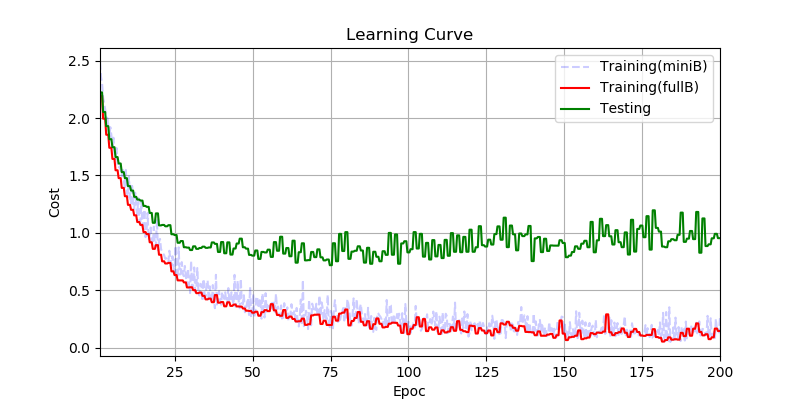

-------------Info---------------
#Classes   :  10
#Features  :  64
#Examples  :  1257
Network    :  [64, 8, 8, 5, 10]
ActiFun    :  ['tanh', 'tanh', 'tanh', 'softmax']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]
Alpha      :  0.01
B1, B2     :  0.9 0.99
lambd      :  0
AdamOpt    :  True
---------------------------
Training Accuracy :: 96.02227525855211
Testing  Accuracy :: 83.33333333333333


In [107]:
plt.close(fig)
fig=plt.figure(1,figsize=(8,4))
for i in range(100):
    NN.fit(itr=2)
    NN.PlotLCurve(pause=0)
    fig.canvas.draw()
    
NN.PlotLCurve()

print(NN)

yi,yp = NN.predict(Xtr)
yti,ytp = NN.predict(Xts)

print('Training Accuracy ::',100*np.sum(yi==ytr)/yi.shape[1])
print('Testing  Accuracy ::',100*np.sum(yti==yts)/yti.shape[1])

In [108]:
plt.close(fig)

### Breast Cancer dataset

In [123]:
from sklearn.datasets import load_breast_cancer
Xy = load_breast_cancer()

In [124]:
X = Xy['data']
y = Xy['target']
print(X.shape, y.shape)

(569, 30) (569,)


In [125]:
split=int(0.7*X.shape[0])
Xtr = X[:split,:].T
ytr = y[:split][None,:]
Xts = X[split:,:].T
yts = y[split:][None,:]
print(Xtr.shape, ytr.shape, Xts.shape, yts.shape)

(30, 398) (1, 398) (30, 171) (1, 171)


In [139]:
mn = np.mean(Xtr,axis=1)[:,None]
sd = np.std(Xtr,axis=1)[:,None]
Xtrn=(Xtr-mn)/sd
Xtsn=(Xts-mn)/sd

In [149]:
NN = deepNet(X = Xtrn,y=ytr,Xts=Xtsn, yts=yts, Net = [8,5],NetAf =['relu'], alpha=0.01,miniBatchSize = 0.3, 
             printCostAt =-1,AdamOpt=True,lambd=0,keepProb =[1.0])

#Classes   :  2
#Features  :  30
#Examples  :  398
Network    :  [30, 8, 5, 1]
ActiFun    :  ['relu', 'relu', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0]


<IPython.core.display.Javascript object>


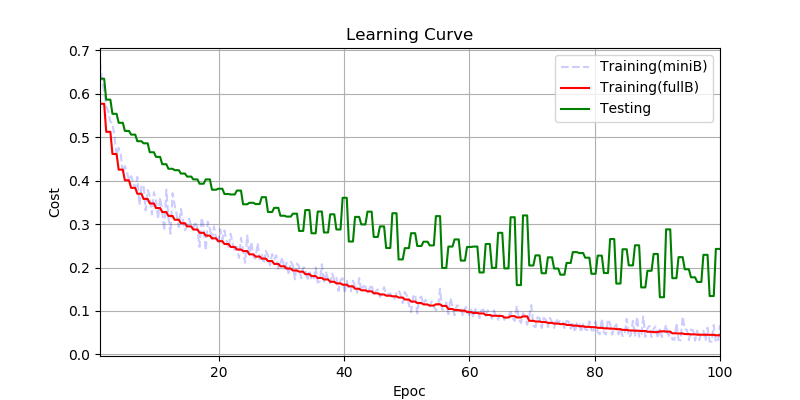

-------------Info---------------
#Classes   :  2
#Features  :  30
#Examples  :  398
Network    :  [30, 8, 5, 1]
ActiFun    :  ['relu', 'relu', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0]
Alpha      :  0.01
B1, B2     :  0.9 0.99
lambd      :  0
AdamOpt    :  True
---------------------------
Training Accuracy :: 99.49748743718592
Testing  Accuracy :: 96.49122807017544


In [150]:
plt.close(fig)
fig=plt.figure(1,figsize=(8,4))
for i in range(50):
    NN.fit(itr=2)
    NN.PlotLCurve(pause=0)
    fig.canvas.draw()
    
NN.PlotLCurve()

print(NN)

yi,yp = NN.predict(Xtrn)
yti,ytp = NN.predict(Xtsn)

print('Training Accuracy ::',100*np.sum(yi==ytr)/yi.shape[1])
print('Testing  Accuracy ::',100*np.sum(yti==yts)/yti.shape[1])

In [151]:
plt.close(fig)